In [88]:
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow 
import numpy as np
from numpy import linalg as LA
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import os
import h5py
from skimage import io, img_as_ubyte
import matplotlib.image as mpimg
from scipy import spatial
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

In [66]:

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1  
)

val_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
    '/Users/sudipkhadka/Desktop/Computer-Vision2/Apparel_images',
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    subset='training'  
)

val_generator = val_datagen.flow_from_directory(
    '/Users/sudipkhadka/Desktop/Computer-Vision2/Apparel_images',
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    subset='validation'  
)


Found 5167 images belonging to 10 classes.
Found 569 images belonging to 10 classes.


In [86]:
model = Sequential()

In [67]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

for i in range(4): 
    model.add(Conv2D(filters=32, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.4))  

for i in range(2):
    model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.6))  

model.add(Flatten())

model.add(Dense(units=256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))  

model.add(Dense(units=256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.8))

model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/Users/sudipkhadka/Desktop/Computer-Vision2/.cl/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
checkpoint = ModelCheckpoint('cnn.keras', 
                             monitor='val_accuracy',  
                             save_best_only=True,     
                             mode='max',             
                             verbose=1)

In [71]:
history = model.fit(
    train_generator, epochs=25, batch_size= 10, validation_data=val_generator, callbacks=[checkpoint])


/Users/sudipkhadka/Desktop/Computer-Vision2/.cl/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2483 - loss: 2.8135
Epoch 1: val_accuracy improved from -inf to 0.24956, saving model to cnn.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 892s 2s/step - accuracy: 0.2485 - loss: 2.8125 - val_accuracy: 0.2496 - val_loss: 2.6914
Epoch 2/25
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5043 - loss: 1.5390
Epoch 2: val_accuracy improved from 0.24956 to 0.35852, saving model to cnn.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 837s 2s/step - accuracy: 0.5043 - loss: 1.5388 - val_accuracy: 0.3585 - val_loss: 2.3672
Epoch 3/25
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5938 - loss: 1.2832
Epoch 3: val_accuracy improved from 0.35852 to 0.66432, saving model to cnn.keras
517/517 ━━━━━━━━━━━━━━━━━━━━ 869s 2s/step - accuracy: 0.5938 - loss: 1.2831 - val_accuracy: 0.6643 - val_loss: 1.0554
Epoch 4/25
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6434 - loss: 1.0954
Epoch 4: val_accuracy improved from 0.66432 to 0.72232, saving 

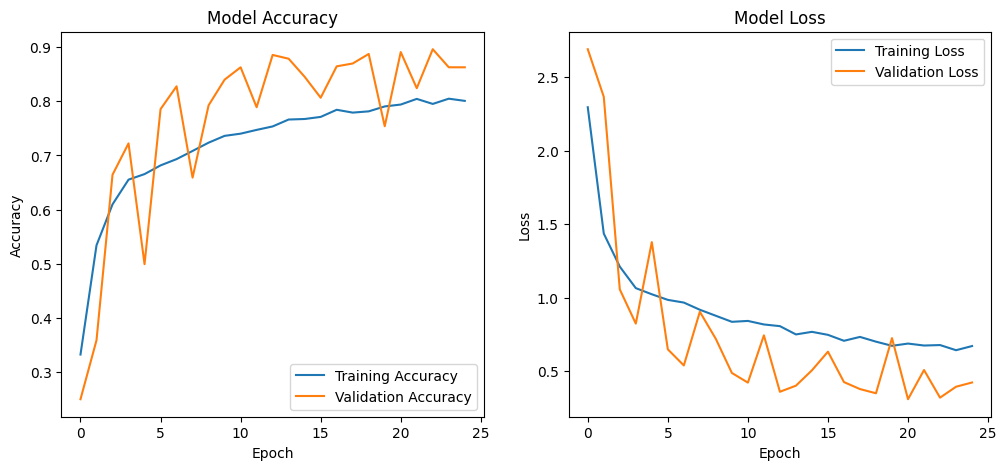

In [72]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [75]:
input_shape = (224, 224, 3)

In [76]:
def cnn_extract_feature(image_path):
    img = image.load_img(image_path, target_size=(input_shape[0], input_shape[1]))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    #img = preprocess_input(img)
    features = model.predict(img)
    norm_features = features[0]/LA.norm(features[0])
    return norm_features

In [77]:
path = "/Users/sudipkhadka/Desktop/Computer-Vision2/Embedding_imges"

In [78]:
import os

In [79]:
image_path = path + "/"

features = []
names = []
for img in os.listdir(image_path):
    if img==".DS_Store":
        continue
    X = cnn_extract_feature(image_path+img)
    features.append(X)
    names.append(img)
features = np.array(features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━

In [80]:
output = "cnn2Features.h5"
h5f = h5py.File(output, "w")
h5f.create_dataset('dataset_1', data=features)
h5f.create_dataset('dataset_2', data=np.string_(names))
h5f.close()

In [81]:
h5f = h5py.File("cnn2Features.h5", "r")
features = h5f['dataset_1'][:]
image_name = h5f['dataset_2'][:]
h5f.close()

In [82]:
def reterive_similar_image(query_image_path):
    plt.imshow(io.imread(query_image_path))
    plt.title("Query Image")
    plt.show()  

    print("Reteriving Images.........")  
    X = cnn_extract_feature(query_image_path)

    scores = []
    for i in range(features.shape[0]):
        score  = 1 - spatial.distance.cosine(X, features[i])
        scores.append(score)
    scores = np.array(scores)
    rank_id = np.argsort(scores)[::-1]
    rank_score = scores[rank_id]

    n = 10
    lists = [os.path.join(path, image_name[index].decode('utf-8')) if isinstance(image_name[index], bytes) else os.path.join(path, image_name[index]) 
         for i, index in enumerate(rank_id[0:n])]

    num_images = len(lists)
    fig, axes = plt.subplots(1, num_images, figsize=(17, 7))
    for i, image_path in enumerate(lists):
        if os.path.exists(image_path):
            img = mpimg.imread(image_path)  
            axes[i].imshow(img)  
            axes[i].axis('off')  
            axes[i].set_title(f"Image Rank {i+1}")
        else:
            print(f"File not found: {image_path}") 
    plt.show()

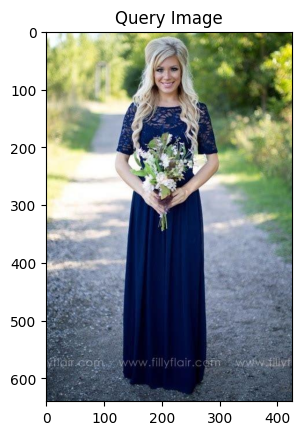

Reteriving Images.........
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


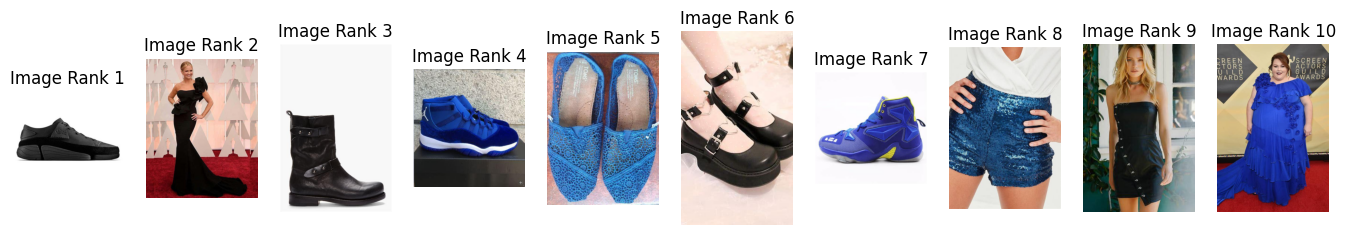

In [83]:
reterive_similar_image("/Users/sudipkhadka/Desktop/Computer-Vision2/query_image/fa3b752a3b52957ec859b26b5dbf7457e8af2513.jpg")

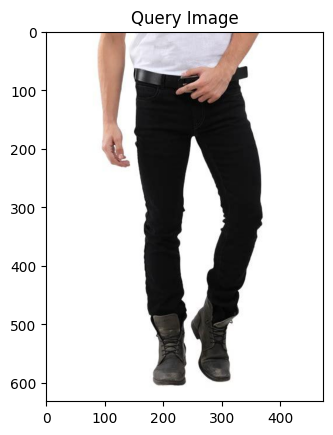

Reteriving Images.........
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


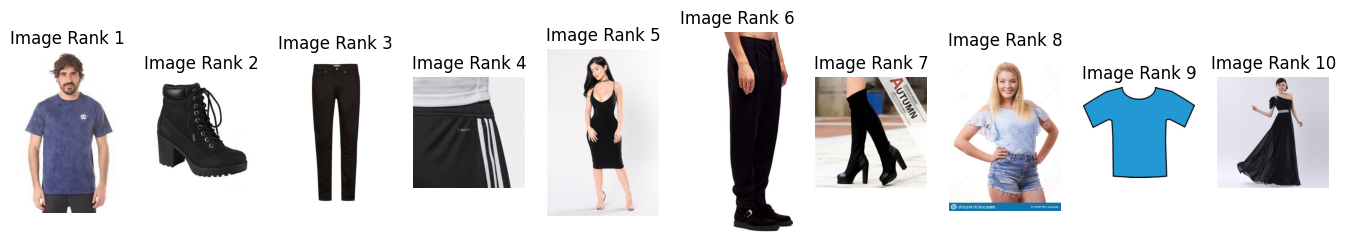

In [84]:
reterive_similar_image('/Users/sudipkhadka/Desktop/Computer-Vision2/query_image/fa60dbf6735fbf1b90977e531d4a4023fc5ec34b.jpg')